### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Data Analytics of Covid_19 Data (Jan 2020 to Oct 2021) in the UK

## Mimi's Github repository

- https://github.com/Mimi-Onno/LSE_DA_COVID_Analysis
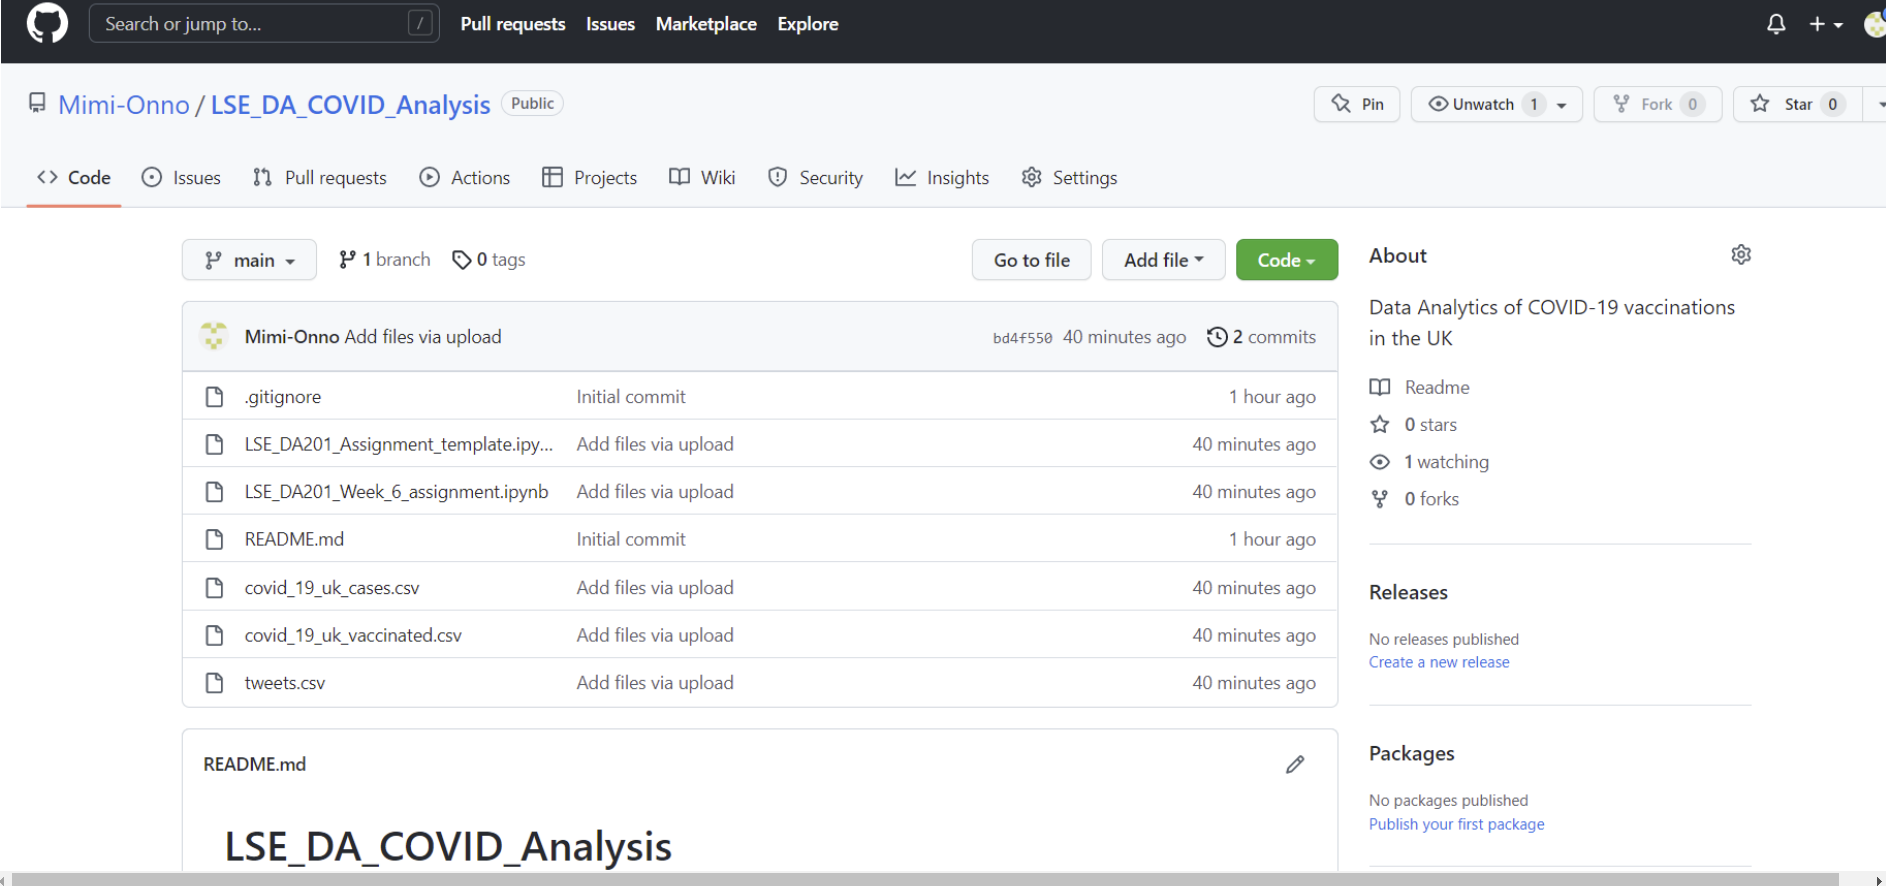


## Environment preparation

In [1]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

sns.set(rc = {'figure.figsize':(15,10)})

## Assignment activity 2: Import and Explore Data

In [2]:
# Load COVID_19_uk_cases.csv and covid_19_uk_vaccinated.csv as cov and vac respectively
cov = pd.read_csv('covid_19_uk_cases.csv')
vac = pd.read_csv('covid_19_uk_vaccinated.csv')

## Validate cov dataframe

In [3]:
# View first five rows of cov
cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0


In [4]:
# View last five rows of cov
cov.tail()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
7579,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,138237.0,8317439.0,0.0,0.0


In [5]:
# Determine the number of rows and columns
print(cov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB
None


In [6]:
# Describe the cov dataframe
print(cov.describe())

               Lat         Long  Intermediate Region Code         Deaths  \
count  7584.000000  7584.000000               7584.000000    7582.000000   
mean     21.840267   -41.440047                 12.500000    6210.202321   
std      28.305518    30.527529                 14.009849   24860.790148   
min     -51.796300   -81.254600                  0.000000       0.000000   
25%      17.851075   -64.667625                  0.000000       0.000000   
50%      20.503650   -60.855483                  2.500000       1.000000   
75%      39.448675    -5.152225                 29.000000      25.000000   
max      55.378100    -2.364400                 29.000000  138237.000000   

              Cases    Recovered  Hospitalised  
count  7.582000e+03  7582.000000   7582.000000  
mean   2.147082e+05   454.691242    685.228568  
std    1.007557e+06  1010.642337    819.256635  
min    0.000000e+00     0.000000      0.000000  
25%    1.200000e+01     0.000000    105.000000  
50%    1.685000e+02  

In [7]:
# Determine the data types of cov
print(cov.shape)
print(cov.value_counts())

(7584, 12)
Province/State            Country/Region  Lat        Long        ISO 3166-1 Alpha 3-Codes  Sub-region Name                  Intermediate Region Code  Date        Deaths  Cases   Recovered  Hospitalised
Anguilla                  United Kingdom  18.220600  -63.068600  AIA                       Latin America and the Caribbean  29                        2020-01-22  0.0     0.0     0.0        0.0             1
Isle of Man               United Kingdom  54.236100  -4.548100   IMN                       Northern Europe                  0                         2021-10-11  54.0    8121.0  0.0        631.0           1
Montserrat                United Kingdom  16.742498  -62.187366  MSR                       Latin America and the Caribbean  29                        2020-01-30  0.0     0.0     0.0        0.0             1
                                                                                                                                                      2020-01-29  0.0 

In [8]:
# Check for missing values.
cov_na = cov[cov.isna().any(axis=1)]
cov_na

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


## Missing values:
2 rows with missing values found in Bermuda on 21 and 22 Sep 2020.<br>
Death, Cases, Recovered and Hospitalised fields have 2 missing values.<br>
Since they are of numeric types, all missing values are replaced with 0.

In [9]:
# Replace all missing values with 0 since they are numeric.
cov = cov.fillna(0)
cov[cov.isna().any(axis=1)]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised


## Validate vac dataframe

In [10]:
# View first five rows of vac
vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0


In [11]:
# View last five rows of vac
vac.tail()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
7579,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,0,0,0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,0,0,0


In [12]:
# Determine the number of rows and columns
print(vac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB
None


In [13]:
# Determine the data types of vac
print(vac.shape)
vac.dtypes

(7584, 11)


Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object

In [14]:
# Check for missing values
vac_na = vac[vac.isna().any(axis=1)]
vac_na.shape

(0, 11)

In [15]:
# Indentify all columns of cov and vac
print(cov.columns)
print(vac.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Vaccinated', 'First Dose',
       'Second Dose'],
      dtype='object')


## Filter the data for Gibraltar

In [16]:
# Create gibraltar_cov DataFrame based on Gibraltar data
gibraltar_cov = cov[cov['Province/State']=='Gibraltar']
gibraltar_cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0


In [17]:
# Create gibraltar_vac DataFrame based on Gibraltar data
gibraltar_vac = vac[vac['Province/State']=='Gibraltar']
gibraltar_vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0


In [18]:
# Print the whole DataFrame of gibraltar_cov
pd.set_option("display.max_rows", None)

gibraltar_cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0


In [19]:
# Print the whole DataFrame of gibraltar_vac
gibraltar_vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0


## Join the dataframes and subset

In [20]:
# Join the dataframes
gibraltar = pd.merge(gibraltar_cov, gibraltar_vac, how='inner', on=None)
gibraltar.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0,0,0,0
1,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0,0,0,0
2,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0,0,0,0
3,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0,0,0,0
4,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0,0,0,0


In [21]:
# Explore behaviour over time
gibraltar.shape

(632, 15)

## The gibraltar dataframe uses the default indexing 0 - 631 based on the 632, total number of rows extracted from the original datasets.

In [22]:
# Determine the index
gibraltar.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            622, 623, 624, 625, 626, 627, 628, 629, 630, 631],
           dtype='int64', length=632)

In [23]:
# Filter the gibraltar dataframe with Deaths, Cases, Recovered, Hospitalised, First Dose, Second Dose
gibraltar_df = gibraltar[['Deaths', 'Cases', 'Recovered', 'Hospitalised', "First Dose", "Second Dose"]]
gibraltar_df.head()

,Deaths,Cases,Recovered,Hospitalised,First Dose,Second Dose
0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0,0


In [24]:
# Filter the gibraltar dataframe with Deaths, Cases, Recovered and Hospitalised
gibraltar_new = gibraltar[['Deaths', 'Cases', 'Recovered', 'Hospitalised']]
gibraltar_new.head()

,Deaths,Cases,Recovered,Hospitalised
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


## Outliers analysis:
1) Use describe() function to determine the descriptive staistics of gibraltar_new dataframe<br>
2) Use pairplot to visualise the districbution of the numeric data and the skewness of individual variable

In [25]:
# Describe the gibraltar_new dataframe
gibraltar_new.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


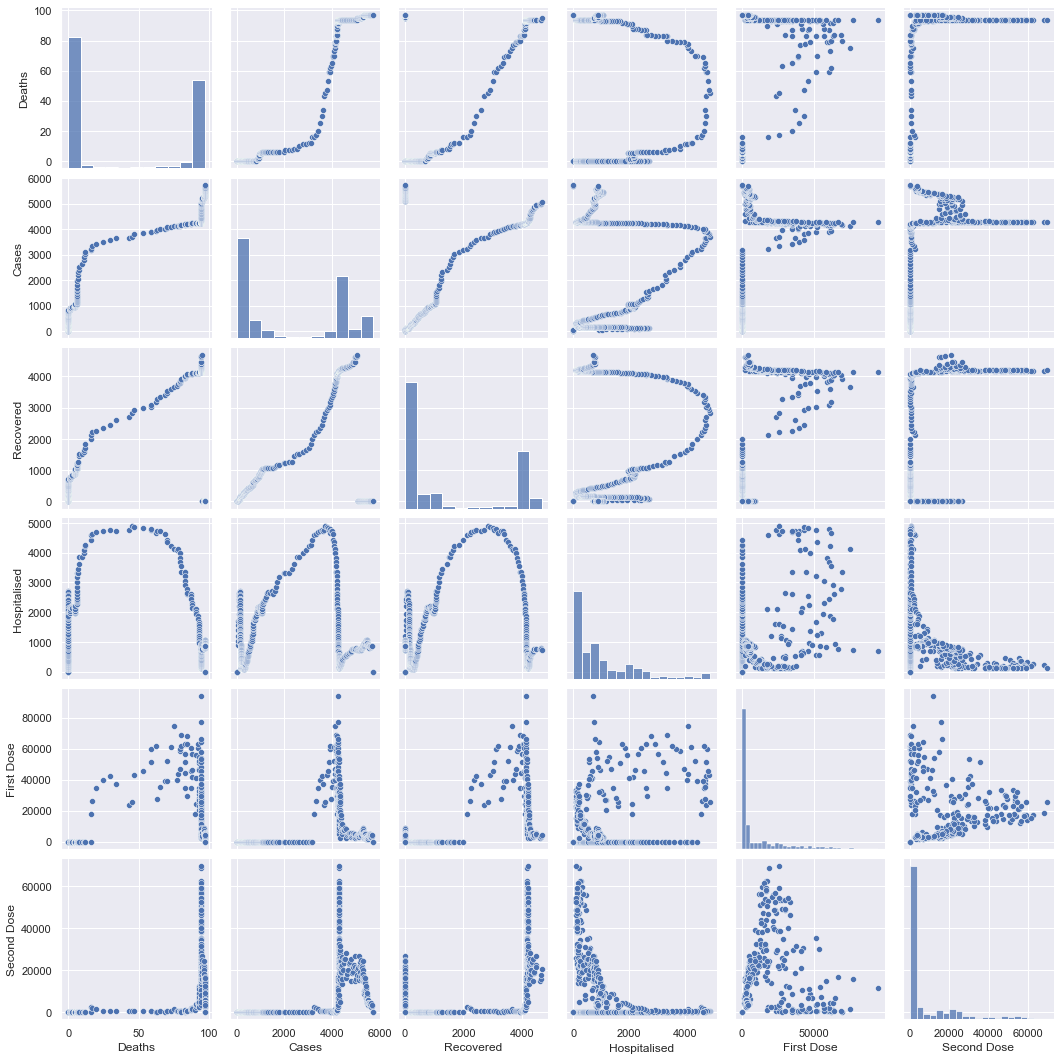

In [26]:
# Visualise the distribution of Cases, Deaths, Hospitalised, Recovered, First Dose and Seoncd Dose
sns.pairplot(gibraltar_df)

## Number of people received first dose in Gibraltar

In [27]:
# Sum the people who received the first dose
first = gibraltar_vac["First Dose"].sum()
print(first)

5870786


## Number of people received second dose in Gibraltar

In [28]:
# Sum the people who received the second dose
second = gibraltar_vac["Second Dose"].sum()
print(second)

5606041


## Number of people vaccinated in Gibratar

In [29]:
# Sum the people who are vaccinated
vaccinated = gibraltar_vac["Vaccinated"].sum()
print(vaccinated)

5606041


## Number of people not fully vaccinated in Gibraltar

In [30]:
# The difference between First and Second dose
unvaccinated = first - second
print(unvaccinated)

264745


## How has the number of vaccinated individuals changed over time?<br> What might these changes indicate?
The vaccination records only started on 1 November 2021 for First Dose, Second Dose and Vaccinated. As there is time lapse between the two doses so the numbers could be backdated but no information has been provided in the datasets.

## Assignment activity 3: Merge and analyse data

In [31]:
# Create a DataFrame covid from cov and vac dataframes
covid = pd.merge(cov, vac, how='inner', on=None)
covid.shape

(7584, 15)

In [32]:
# Print the total rows in covid
print(len(covid))

7584


In [33]:
# Create covid_new, defined relevant columns
covid_new = covid[["Province/State", "Country/Region", "Date", "Vaccinated", "First Dose", "Second Dose", "Deaths", "Cases", "Recovered", "Hospitalised"]]
covid_new.shape

(7584, 10)

In [34]:
# Validate covid_new data types
covid_new.dtypes

Province/State     object
Country/Region     object
Date               object
Vaccinated          int64
First Dose          int64
Second Dose         int64
Deaths            float64
Cases             float64
Recovered         float64
Hospitalised      float64
dtype: object

In [35]:
# Fix the date column data type from object type to date
covid_new = covid_new.astype(dtype={'Date': np.datetime64})
covid_new["Date"].head()

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: Date, dtype: datetime64[ns]

In [36]:
# Validate data type of Columns "Date"
covid_new.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
dtype: object

In [37]:
# Check for duplicate rows
covid_new.duplicated().sum()

0

No duplicates found

## Find the difference between first and second dose by province/state

In [38]:
# Calculate difference between first and second dose and groupby 'Province/State'
covid_new['Difference'] = covid_new.loc[:, "First Dose"] - covid_new.loc[:, "Second Dose"]
covid_new.groupby('Province/State')
covid_new.head()

,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,Difference
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0.0,0.0,0.0,0.0,0
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0.0,0.0,0.0,0.0,0
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0.0,0.0,0.0,0.0,0
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0.0,0.0,0.0,0.0,0
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0.0,0.0,0.0,0.0,0


In [39]:
# Filter by Difference is not zero, followed by Province/State, Date, First Dose, Second Dose, Difference
partial_trend = covid_new['Difference'] != 0
covid_new[partial_trend].loc[:, ["Province/State","Date","First Dose","Second Dose", "Difference"] ]

,Province/State,Date,First Dose,Second Dose,Difference
355,Anguilla,2021-01-11,15233,2181,13052
356,Anguilla,2021-01-12,21804,1687,20117
357,Anguilla,2021-01-13,29289,1023,28266
358,Anguilla,2021-01-14,33253,552,32701
359,Anguilla,2021-01-15,35838,442,35396
360,Anguilla,2021-01-16,31094,275,30819
361,Anguilla,2021-01-17,19961,235,19726
362,Anguilla,2021-01-18,21428,479,20949
363,Anguilla,2021-01-19,36032,395,35637
364,Anguilla,2021-01-20,38168,358,37810


## Observations: wip


## Find the difference between first and second dose over time by province/state

In [40]:
# Groupby and calculate the difference between first and second dose over time
covid_trend =  pd.DataFrame()
covid_trend['First Dose'] = covid_new.groupby('Province/State')['First Dose'].agg('sum')
covid_trend['Second Dose'] = covid_new.groupby('Province/State')['Second Dose'].agg('sum')
covid_trend['Difference'] = covid_trend['First Dose']  - covid_trend['Second Dose']
covid_trend['Percentage'] = covid_trend['Difference']/covid_trend['First Dose']*100

covid_trend.sort_values(by=['Difference'], ascending=False)

,First Dose,Second Dose,Difference,Percentage
Province/State,,,,
Gibraltar,5870786,5606041,264745,4.509532
Montserrat,5401128,5157560,243568,4.509577
British Virgin Islands,5166303,4933315,232988,4.509763
Anguilla,4931470,4709072,222398,4.509771
Isle of Man,4226984,4036345,190639,4.510048
Falkland Islands (Malvinas),3757307,3587869,169438,4.509560
Cayman Islands,3522476,3363624,158852,4.509669
Channel Islands,3287646,3139385,148261,4.509640
Turks and Caicos Islands,3052822,2915136,137686,4.510122


In [41]:
# Sort by percentage
covid_trend.sort_values(by=['Percentage'], ascending=False)

,First Dose,Second Dose,Difference,Percentage
Province/State,,,,
Turks and Caicos Islands,3052822,2915136,137686,4.510122
Isle of Man,4226984,4036345,190639,4.510048
Anguilla,4931470,4709072,222398,4.509771
British Virgin Islands,5166303,4933315,232988,4.509763
Cayman Islands,3522476,3363624,158852,4.509669
Channel Islands,3287646,3139385,148261,4.509640
Montserrat,5401128,5157560,243568,4.509577
Falkland Islands (Malvinas),3757307,3587869,169438,4.509560
Gibraltar,5870786,5606041,264745,4.509532


## Observations:
Gibratar has the highest number of individuals who have received a first dose but not a second dose.<br>
Turks and Caicos Islands have the highest percentage of individuals who have received a first dose but not a second dose.<br>

## Assignment activity 4: Visualise and identify initial trends

The government is looking to promote second dose vaccinations and would like to know the best possible area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)?
- Visualise both outputs.

### 4.1) Report expectations:
- Consider additional features (deaths and recoveries).
- Visualise the data.
- Note observations:
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Hints**: 
 - Evalute different features to improve decision making (deaths and recoveries). 
 - Why it is important to explore data and use different views?
 - Highlight two or three suggestions to get junior team members started in terms of good practices.

## Plot

In [42]:
covid_trend

,First Dose,Second Dose,Difference,Percentage
Province/State,,,,
Anguilla,4931470,4709072,222398,4.509771
Bermuda,2817981,2690908,127073,4.509363
British Virgin Islands,5166303,4933315,232988,4.509763
Cayman Islands,3522476,3363624,158852,4.509669
Channel Islands,3287646,3139385,148261,4.509640
Falkland Islands (Malvinas),3757307,3587869,169438,4.509560
Gibraltar,5870786,5606041,264745,4.509532
Isle of Man,4226984,4036345,190639,4.510048
Montserrat,5401128,5157560,243568,4.509577


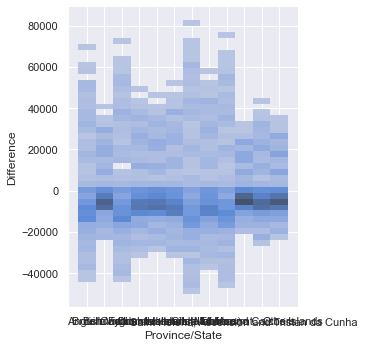

In [43]:
# Create a barplot.
#sns.displot(x='Province/State', y='Difference',data=covid_trend)
data_set = pd.DataFrame()
data_set = covid_new[partial_trend].loc[:, ["Province/State","Difference"] ]
data_set
#sns.countplot( y='Province/State', data=data_set)
sns.displot(x='Province/State', y='Difference', data=data_set)

In [44]:
# Absolute numbers

In [45]:
# Relative numbers (%)

In [46]:
#


In [47]:
# Sort and display

In [48]:
# Visualise

In [49]:
# Smooth out the data by looking at monthly figures

In [50]:
# Other features evaluated (data preparation, output and plots)

***Notes and observations:***
Your observations here. (Double click to edit)

***Examples could include:***
- Are there other trends in terms of recoveries or hospitalisations compared to other features that you found interesting and that may add value in terms of the decision making process?
- Any other observations regarding the data?
- Any suggestions for improvements and further analysis?
- What would your future data requirements be?

## 5) Assignment activity 5: External data 
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional `#tags` or keywords that could potentially provide insights into your COVID-19 analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar data sets to provide richer insights.

### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data.
- Search for hash-tags or keywords.
- Create DataFrames and visualisations.
- Note your observations.

In [51]:
# Import the tweet data set


In [52]:
# Explore the data: info(), head()


In [53]:
# Explore the structure, count the tweets, get the elements of interest


In [54]:
# Create a DataFrame with the text only


In [55]:
# Loop through the messages and build a list of values containing the #-symbol


In [56]:
# Filter and sort


In [57]:
# Plot


### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

## 6) Assignment activity 6: 

### 6.1) Report expectations:
- Demonstrate using external function and interpret results.
- Note observations.

In [58]:
# You can copy and paste the relevant code cells from the provided template here.

### 6.2) Presentation expectations:
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Have we covered everything from a data ethics standpoint? Is there anything else we need to implement from a data ethics perspective? 